In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import ydf


In [137]:
df=pd.read_csv("../Dataset/rainfall_predict_train.csv")
df_test=pd.read_csv("../Dataset/rainfall_predict_test.csv")

In [138]:
df.head(3)

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1


In [139]:
df_test.head(3)

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,2190,1,1019.5,17.5,15.8,12.7,14.9,96.0,99.0,0.0,50.0,24.3
1,2191,2,1016.5,17.5,16.5,15.8,15.1,97.0,99.0,0.0,50.0,35.3
2,2192,3,1023.9,11.2,10.4,9.4,8.9,86.0,96.0,0.0,40.0,16.9


In [140]:
df=df.drop(columns=["id","day"])
test=df_test.drop(columns=["id","day"])

In [141]:
print(test.columns)  # Check available column names


Index(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'sunshine', 'winddirection', 'windspeed'],
      dtype='object')


In [142]:
test["winddirection"]=test["winddirection"].fillna(test["winddirection"].mean())

<Axes: >

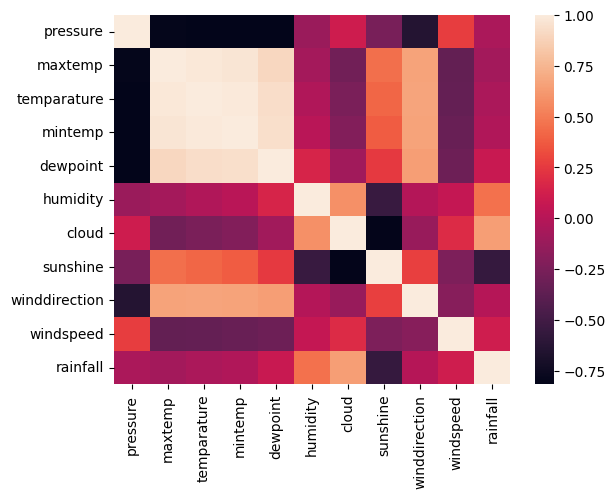

In [143]:
sns.heatmap(df.corr())

In [144]:
df.rainfall.value_counts()

rainfall
1    1650
0     540
Name: count, dtype: int64

<Axes: xlabel='rainfall', ylabel='count'>

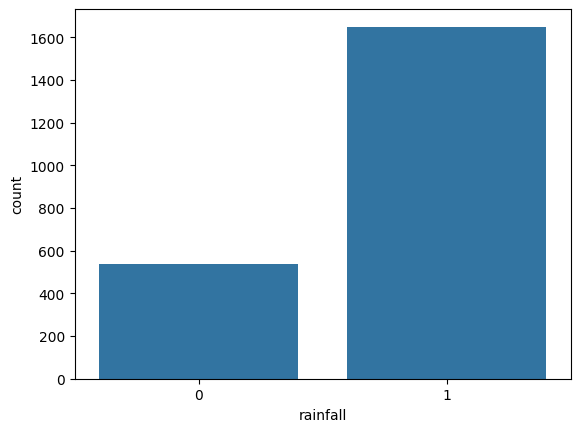

In [145]:
sns.barplot(df["rainfall"].value_counts())

In [146]:
x=df.select_dtypes(include=["float64","int64"])
x.columns.tolist()

['pressure',
 'maxtemp',
 'temparature',
 'mintemp',
 'dewpoint',
 'humidity',
 'cloud',
 'sunshine',
 'winddirection',
 'windspeed',
 'rainfall']

In [147]:
df.shape

(2190, 11)

In [148]:
# def remove_outliers(df):
#     # Calculate Q1, Q3, and IQR
#     columns=df.select_dtypes(include=["float64","int64"]).columns.tolist()
#     for i in columns:
#         Q1 = df[i].quantile(0.25)
#         Q3 = df[i].quantile(0.75)
#         IQR = Q3 - Q1

#         # Define the outlier range
#         lower_bound = Q1 - 1.5 * IQR
#         upper_bound = Q3 + 1.5 * IQR

#         # Filter out the outliers
#         df = df[(df[i] >= lower_bound) & (df[i] <= upper_bound)]
#     return df

In [149]:
# df=remove_outliers(df)

In [150]:
X=df.drop(columns=["rainfall"])
Y=df["rainfall"]

In [151]:
X.shape

(2190, 10)

In [152]:
X.head(3)

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2
1,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9
2,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1


In [153]:
# from imblearn.over_sampling import SMOTE

# # Create SMOTE sampler
# smote = SMOTE()

# # Resample the dataset
# X, Y = smote.fit_resample(X, Y)


In [154]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)
test=scaler.transform(test)

In [155]:
X.shape

(2190, 10)

In [156]:
Y

0       1
1       1
2       1
3       1
4       0
       ..
2185    1
2186    1
2187    1
2188    1
2189    1
Name: rainfall, Length: 2190, dtype: int64

In [157]:
import numpy as np
np.bincount(Y)  # For binary classification (0s and 1s)


array([ 540, 1650], dtype=int64)

In [158]:
np.isnan(X).any(), np.isinf(X).any()


(False, False)

In [159]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.2)

In [160]:
tf.keras.backend.clear_session()

In [161]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

# Define the model
tf_model = tf.keras.Sequential([
    Dense(64, activation='relu', input_shape=(X.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(1, activation='sigmoid')  # Output layer for binary classification
])


c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [162]:
tf_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,617 (29.75 KB)

 Trainable params: 7,297 (28.50 KB)

 Non-trainable params: 320 (1.25 KB)

In [163]:
tf_model.compile(optimizer=tf.keras.optimizers.Adam(.1),loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),metrics=['accuracy', 'AUC', 'Precision'])

In [164]:
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_Precision', factor=0.3, patience=10, min_lr=1e-6
)
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='accuracy', patience=25, restore_best_weights=True
)

In [165]:
history=tf_model.fit(X,Y,epochs=200,validation_split=0.25,batch_size=32,callbacks=[early_stopping,lr_scheduler])

Epoch 1/200
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - AUC: 0.7979 - Precision: 0.8537 - accuracy: 0.7936 - loss: 0.5103 - val_AUC: 0.8605 - val_Precision: 0.9402 - val_accuracy: 0.7883 - val_loss: 1.5397 - learning_rate: 0.1000
Epoch 2/200
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.8566 - Precision: 0.8627 - accuracy: 0.8363 - loss: 0.3879 - val_AUC: 0.8814 - val_Precision: 0.9309 - val_accuracy: 0.8157 - val_loss: 0.6334 - learning_rate: 0.1000
Epoch 3/200
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.8746 - Precision: 0.8777 - accuracy: 0.8539 - loss: 0.3669 - val_AUC: 0.8808 - val_Precision: 0.9149 - val_accuracy: 0.8650 - val_loss: 0.3786 - learning_rate: 0.1000
Epoch 4/200
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.8694 - Precision: 0.8648 - accuracy: 0.8504 - loss: 0.3799 - val_AUC: 0.8836 - val_Precision: 0.9116 - val_accuracy: 0.8704 - val_loss: 0.4182 - learning_rate: 0.1000
Epoch 5/200
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.8520 - Precision: 0.8296 - accur

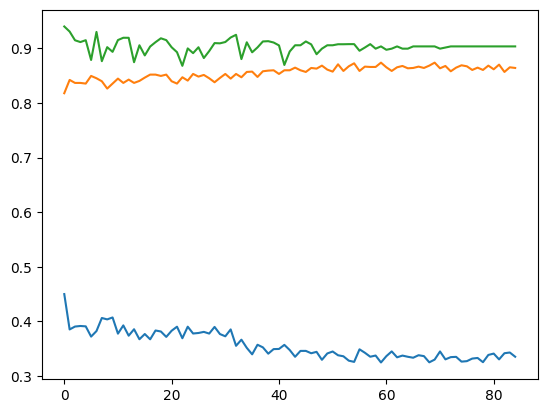

In [166]:

plt.plot(history.history["loss"])
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_Precision"])

In [167]:
# ydf_model=ydf.RandomForestLearner(
#     label="rainfall",
#     split_axis="SPARSE_OBLIQUE",
#     sparse_oblique_normalization="MIN_MAX",
#     sparse_oblique_num_projections_exponent=1.0,
#     growing_strategy="BEST_FIRST_GLOBAL",
#     num_candidate_attributes_ratio=0.9,
#     task=ydf.Task.CLASSIFICATION
#     ).train(df)

In [168]:
# ydf_model.describe()

In [169]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],         # Regularization strength
    'kernel': ['linear', 'rbf'],     # Kernel types (linear, RBF)
    'gamma': ['scale', 'auto', 0.01, 0.1, 1]  # Kernel coefficient (only for 'rbf' kernel)
}

# Create SVC model
svc = SVC()

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X, Y)

# Best parameters
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


In [170]:
from sklearn.metrics import accuracy_score
best_svc = SVC(**grid_search.best_params_)
best_svc.fit(X, Y)

# Predict
y_pred = best_svc.predict(test)

# # Evaluate
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Test Accuracy: {accuracy:.4f}")


In [203]:
import xgboost as xgb
# Define the XGBoost classifier with given hyperparameters
xgb_classifier = xgb.XGBClassifier(
    n_estimators=2500,
    learning_rate=0.00652133032592785,  # 'eta' is learning_rate
    gamma=0.01865859948765318,
    max_depth=31,
    min_child_weight=50,
    subsample=0.8956431754146083,
    colsample_bytree=0.3670732604094118,
    grow_policy='lossguide',
    max_leaves=70,
    enable_categorical=True,
    n_jobs=-1,
    tree_method='hist',
    objective='binary:logistic',  # Binary classification
    eval_metric='logloss'  # Loss function for evaluation
)

xgb_classifier.fit(X, Y)
y_pred = xgb_classifier.predict(test)
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Test Accuracy: {accuracy:.4f}")


In [171]:
predicted_y=tf_model.predict(test)

predicted_y=predicted_y>.5


predicted_y=predicted_y.astype(int)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [172]:
predicted_y=predicted_y.ravel()
ID=df_test["id"].ravel()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12896\3002817882.py:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  ID=df_test["id"].ravel()


In [ ]:
submission = pd.DataFrame({
    "id": ID,
    "rainfall": predicted_y
})
submission.head()

,id,rainfall
0,2190,1
1,2191,1
2,2192,1
3,2193,0
4,2194,0


In [205]:
submission.shape

(730, 2)

In [206]:
submission.to_csv("rainfall_predict.csv",index=False)